In [110]:
def extract_score_from_line(line):
    """Given a line from the output text file, extract and return the accuracy and uncertainty."""
    return line.split()[-3][:-1]

def extract_all_scores_from_lines(lines):
    """Given a list of lines from the output text file, extract and return the accuracy and uncertainty for train, test split."""

    lines = [line for line in lines if '600 Test Acc' in line]
    test_acc = extract_score_from_line(lines[-2])
    return test_acc

In [112]:
results = []

for dataset in ['swissprot', 'tabula_muris']:
    for hidden_size in [256, 512, 1024]:
        for dropout in [0.25, 0.5, 0.75]:
            for n_layers in [2, 3, 4]:
                with open(f'./results/{dataset}_{hidden_size}_{dropout}_{n_layers}.txt', 'r') as f:
                    lines = f.readlines()
                if 'test' not in lines[-2]:
                    continue
                test_acc = extract_all_scores_from_lines(lines)
                results.append(
                    {'dataset': dataset,
                     'hidden_size': hidden_size,
                     'dropout': dropout,
                     'n_layers': n_layers,
                     'test_acc': test_acc,
                    })

manual_results = [
    [256, 0.5, 3, 77.93],
    [256, 0.75, 2, 77.93],
    [256, 0.75, 3, 77.93],
    [512, 0.25, 2, 79.72],
    [512, 0.25, 3, 82.13],
    [512, 0.25, 4, 76.79],
    [512, 0.5, 2, 79.51],
    [512, 0.5, 3, 77.86],
    [512, 0.75, 2, 78.8],
    [512, 0.75, 3, 78.42],
    [1024, 0.25, 2, 80.31],
    [1024, 0.25, 3, 72.64],
    [1024, 0.25, 4, 76.15],
    [1024, 0.75, 4, 71.74],
]

for row in manual_results:
    results.append(
        {'dataset': 'tabula_muris',
         'hidden_size': row[0],
         'dropout': row[1],
         'n_layers': row[2],
         'test_acc': row[3],
        })          

In [113]:
import pandas as pd

df = pd.DataFrame(results)
df['test_acc'] = df['test_acc'].astype(float)

# Find the model with the max test accuracy for each dataset
df_tabula = df[df['dataset'] == 'tabula_muris']
df_swiss = df[df['dataset'] == 'swissprot']

In [119]:
df_tabula.drop(columns=['dataset'])
df_tabula.sort_values(by=['hidden_size', 'dropout', 'n_layers'], ascending=True)

,dataset,hidden_size,dropout,n_layers,test_acc
26,tabula_muris,256,0.25,2,82.7200
27,tabula_muris,256,0.25,3,79.2000
28,tabula_muris,256,0.25,4,80.2300
29,tabula_muris,256,0.50,2,82.0800
39,tabula_muris,256,0.50,3,0.7793
30,tabula_muris,256,0.50,4,78.6400
40,tabula_muris,256,0.75,2,0.7793
41,tabula_muris,256,0.75,3,0.7793
31,tabula_muris,256,0.75,4,78.7900
42,tabula_muris,512,0.25,2,0.7972


In [102]:
df_swiss.drop(columns=['dataset'])
df_swiss.sort_values(by=['test_acc'], ascending=False)[['hidden_size', 'dropout', 'n_layers', 'test_acc', 'test_unc']]

,hidden_size,dropout,n_layers,test_acc,test_unc
11,512,0.25,4,48.235556,9.518679
18,1024,0.25,2,48.024444,8.457440
10,512,0.25,3,47.435556,7.550025
14,512,0.50,4,47.355556,8.628606
21,1024,0.50,2,46.871111,8.395041
13,512,0.50,3,46.026667,8.890738
1,256,0.25,3,45.177778,7.728702
23,1024,0.50,4,44.826667,8.354969
4,256,0.50,3,44.115556,8.662134
2,256,0.25,4,43.837778,8.479014


/var/folders/wv/rkgyh65d1jx0nzbn07gn8f380000gn/T/ipykernel_30103/528830246.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(df_tabula.groupby(['hidden_size', 'n_layers']).mean()['test_acc'].unstack())


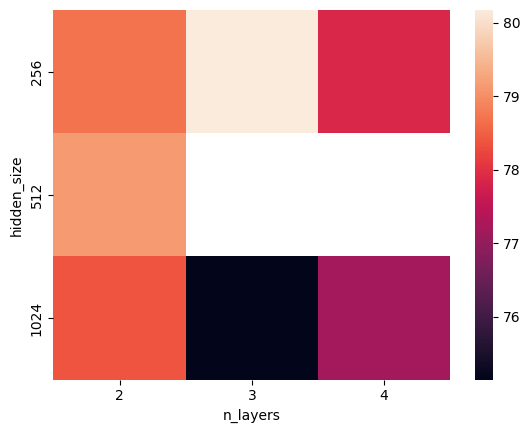

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap of test accuracy for each dataset over the number of layers and hidden size
sns.heatmap(df_tabula.groupby(['hidden_size', 'n_layers']).mean()['test_acc'].unstack())
plt.show()

/var/folders/wv/rkgyh65d1jx0nzbn07gn8f380000gn/T/ipykernel_30103/3142097030.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(df_swiss.groupby(['hidden_size', 'n_layers']).mean()['test_acc'].unstack())


<Axes: xlabel='n_layers', ylabel='hidden_size'>

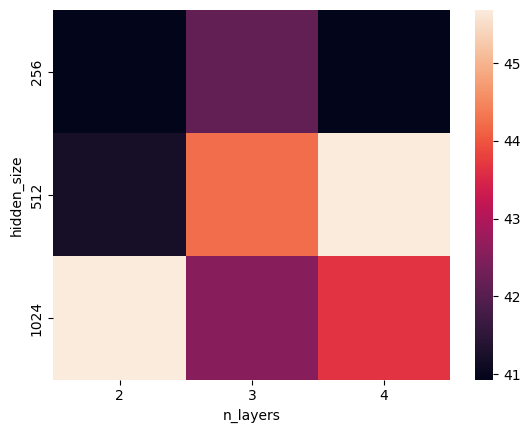

In [81]:
import seaborn as sns
# Heatmap of test accuracy for each dataset over the number of layers and hidden size
sns.heatmap(df_swiss.groupby(['hidden_size', 'n_layers']).mean()['test_acc'].unstack())

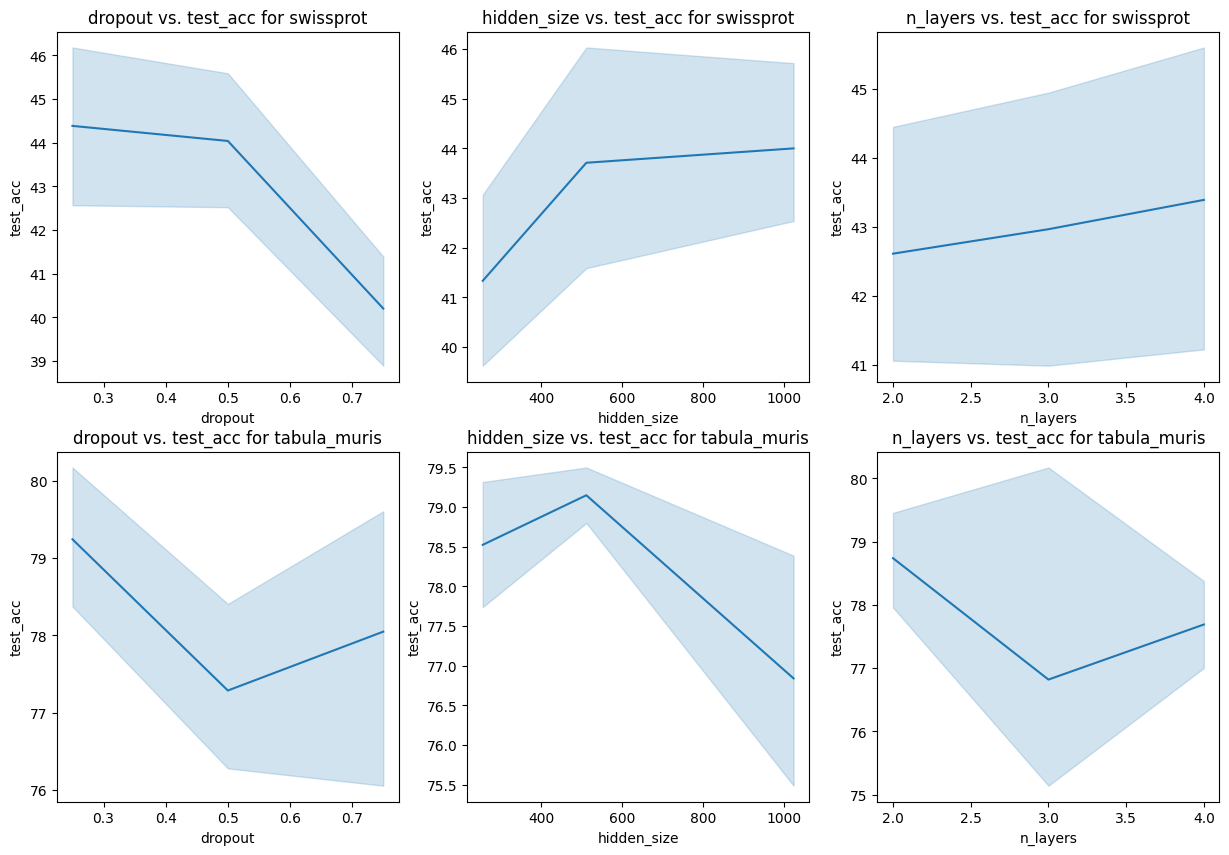

In [90]:
# 6 plots for each dataset, for test_acc over dropout, for each hidden_size and n_layers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, dataset in enumerate([df_swiss, df_tabula]):
    for j, col in enumerate(['dropout', 'hidden_size', 'n_layers']):
        sns.lineplot(x=col, y='test_acc', data=dataset, ax=axes[i, j])
        axes[i, j].set_title(f'{col} vs. test_acc for {dataset.iloc[0]["dataset"]}')